In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

plt.ylabel("bond dimension")
plt.xlabel("time")

dt=0.1
lab="b"
for U in [-0.5,0.5]:
    for cnImp in [2,-1]:
        for L in [200]:
            n0=np.loadtxt(f"data/noipf{lab}/ipc_U{U}_dt{dt}_cdt{dt}_cnImp{cnImp}/L{L}/irlm_no_L{L}.txt", skiprows=1)
            #n0old=np.loadtxt(f"data/dt{dt}/tdvp_no8/L{L}/irlm_no_L{L}.txt", skiprows=1)
            #n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
            #plt.plot(n0old[:,0],n0old[:,2], label=f"old: dt={dt} L={L}", color="green")
            #plt.plot(n0gs2[:,0],n0gs2[:,2], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
            plt.plot(n0[:,0],n0[:,2], label=f"nImp={cnImp} IP: U={U}, dt={dt} L={L}")    
plt.legend(loc="upper left")

In [ ]:
plt.ylabel("number of active orbitals")
plt.xlabel("time")

dt=0.1
for lab in ["b","c"]:
    for L in [200,100]:
        n0=np.loadtxt(f"data/noipf{lab}/ipc_U{U}_dt{dt}_cdt{dt}_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
        #n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
        #plt.plot(n0gs2[:,0],n0gs2[:,6], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
        plt.plot(n0[:,0],n0[:,6], label=f"gs2 IP: U={U}, dt={dt} L={L}")    
plt.legend()

### Real space occupations

In [1]:
def LoadComplexData(file,**genfromtext_args):
    """
    Load complex data in the C++ format in numpy.
    """
    array_as_strings = np.loadtxt(file,dtype=str,**genfromtext_args)
    complex_parser = np.vectorize(lambda x: complex(*eval(x)))
    return complex_parser(array_as_strings)

7.922212403864093e-12
(100.00000000001995-2.1988256468454926e-15j)
1.190116044543523e-11
(100.00000000003402-1.3542953211834024e-14j)
1.5789917601936186e-11
(100.00000000004762-1.1683380022881962e-14j)
1.9822715915543218e-11
(100.00000000006267+3.1723858109034855e-14j)
2.387168713956042e-11
(100.00000000007907-4.401157296694567e-15j)
2.801623358967836e-11
(100.0000000000957-2.878999185163647e-14j)
3.211625339903156e-11
(100.00000000011413-2.8938308689610916e-14j)
3.6319560513358197e-11
(100.0000000001327-2.465733280665406e-14j)
4.056949573605261e-11
(100.00000000015055+2.7952892402854086e-14j)


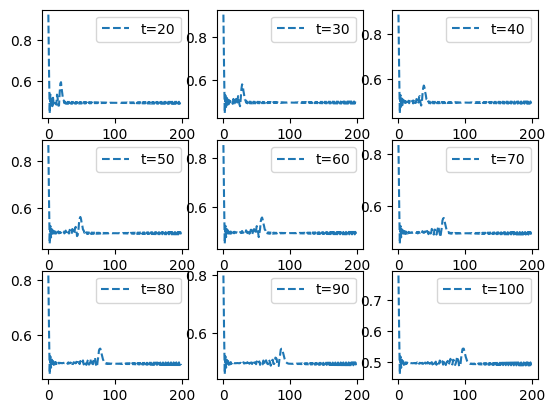

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
figure, axis = plt.subplots(3, 3)
U=-0.5
dt=0.1
for t in range(0,9):
    i=t//3
    j=t%3
    ti=t+2
    for L in [200]:    
        suffix=f"t{ti*100}"
        cc=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/cc_L{L}_{suffix}.txt")
        orb=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/orb_L{L}_{suffix}.txt")
        orb=np.matrix(orb)
        print(np.linalg.norm(orb @ orb.H-np.identity(L)))
        ccr = orb @ cc @ orb.H
        axis[i,j].plot(range(0,L),[np.real(x) for x in ccr.diagonal().tolist()[0][0:]], '--', label=f't={ti*10}')
        print(np.trace(ccr))
#plt.plot([.1/x for x in range(1,L)],'o-')
    axis[i,j].legend()
    
plt.show()

2.0533957362104324e-12
(46.873689244712004-3.3439288083289616e-15j)
2.844149925301324e-12
(46.1305400096559-2.6211753516834698e-14j)
3.631739745997968e-12
(45.40290660557004-1.8601415513878888e-15j)
4.129848663194941e-12
(44.61683476264568+3.3871718020000305e-15j)
4.526069248715878e-12
(43.830148803141086+8.987376339511425e-16j)
4.946800920332501e-12
(42.999788644523164+1.5746219549982077e-14j)
5.346725207444774e-12
(42.15780098899332+3.3451733017282208e-15j)
5.7382832960973315e-12
(41.30303211341629+1.657290052218397e-14j)
6.146814461935371e-12
(40.44062973381654+2.2528859275113347e-14j)


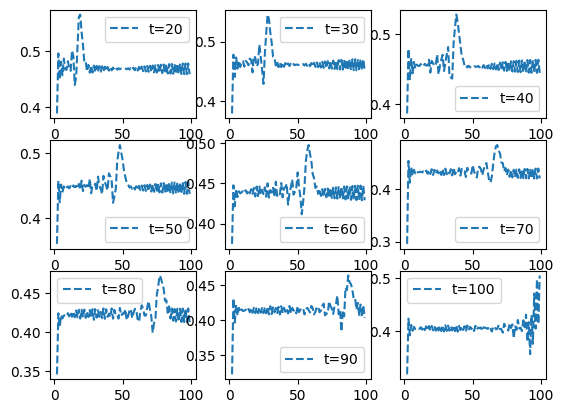

In [6]:
figure, axis = plt.subplots(3, 3)
for t in range(0,9):
    i=t//3
    j=t%3
    ti=t+2
    for L in [100]:    
        suffix=f"t{ti*100}"
        cc=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp-1/L{L}/cck_L{L}_{suffix}.txt")
        orb=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp-1/L{L}/orb_L{L}_{suffix}.txt")
        orb=np.matrix(orb)
        print(np.linalg.norm(orb @ orb.H-np.identity(100)))
        ccr = orb @ cc @ orb.H
        axis[i,j].plot(range(2,L),[np.real(x) for x in ccr.diagonal().tolist()[0][2:]], '--', label=f't={ti*10}')
        print(np.trace(ccr))
    axis[i,j].legend()    
plt.show()

6.646054348024186e-11
(200.0000000003124+2.531046516449545e-14j)
9.873225070349704e-11
(200.000000000452+1.2707488190985708e-15j)
1.3145962655980521e-10
(200.0000000006006+8.146592050954836e-14j)
1.6395436192789946e-10
(200.00000000074448+1.9684704954771332e-14j)
1.9594047604343646e-10
(200.0000000008876+1.522935649585664e-14j)
(181.22132756837414+4.5439235229040506e-14j) (0.829334334274322+3.815201282472155e-18j)
(175.01472138820233-3.880688692131846e-14j) (0.7735216467152025-2.548040374989294e-17j)
(168.58434390323146+3.9274992084041344e-14j) (0.7177421162157118-2.698319787952451e-17j)
(161.90317763959916-1.4776778798043555e-13j) (0.6619955960759645-2.473135050958929e-18j)
(155.02542761234378+2.6643776198083073e-15j) (0.6069600939911778-1.071258579164892e-17j)


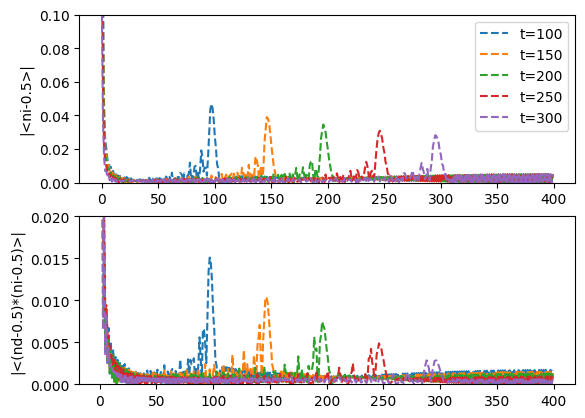

In [50]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
figure, axis = plt.subplots(2, 1)

for ti in [100,150,200,250,300]:
    for L in [400]:    
        suffix=f"t{ti*10}"
        cc=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/cc_L{L}_{suffix}.txt")
        orb=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/orb_L{L}_{suffix}.txt")
        orb=np.matrix(orb)
        print(np.linalg.norm(orb @ orb.H-np.identity(L)))
        ccr = orb @ cc @ orb.H
        axis[0].plot(range(0,L),[abs(x-0.5) for x in ccr.diagonal().tolist()[0][0:]], '--', label=f't={ti}')
        print(np.trace(ccr))

axis[0].legend()
axis[0].set_ylim(0,0.1)
axis[0].set_ylabel("|<ni-0.5>|")

for ti in [100,150,200,250,300]:
    for L in [400]:    
        suffix=f"t{ti*10}"
        cc=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/cc_L{L}_{suffix}.txt")
        cck=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/cck_L{L}_{suffix}.txt")
        orb=LoadComplexData(f"data/noipf/ipc_U{U}_dt{dt}_cdt{dt}_cnImp2/L{L}/orb_L{L}_{suffix}.txt")
        orb=np.matrix(orb)
        ccr = orb @ cc @ orb.H
        cckr = orb @ cck @ orb.H
        #axis[1].plot(range(2,L),[abs(x) for x in (cckr*np.sqrt(ccr[0,0])-ccr*ccr[0,0]).diagonal().tolist()[0][2:]], '--', label=f't={ti}')
        axis[1].plot(range(2,L),[abs(x) for x in (cckr*np.sqrt(ccr[0,0])-0.5*ccr-0.5*ccr[0,0]+0.25).diagonal().tolist()[0][2:]], '--', label=f't={ti}')
        print(np.trace(cckr), ccr[0,0])

axis[1].set_ylabel("|<(nd-0.5)*(ni-0.5)>|")
#axis[1].set_yscale("log")
axis[1].set_ylim(0,0.02)
plt.show()

In [33]:
ccr[0,0]

(0.5028323345977321-1.015748147204738e-17j)